In [56]:
import os.path
from os import path
import pandas as pd

# 캐글 ↓제출경로
data_path = '/kaggle/input/cat-in-the-dat/'
if not path.exists(data_path):
    data_path = './input/'
print(f'input directory path : {data_path}')

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

print(f'train.shape : {train.shape}')
print(f'test.shape : {test.shape}')

input directory path : ./input/
train.shape : (300000, 24)
test.shape : (200000, 23)


In [57]:
train.head().T


id,0,1,2,3,4
bin_0,0,0,0,0,0
bin_1,0,1,0,1,0
bin_2,0,0,0,0,0
bin_3,T,T,F,F,F
bin_4,Y,Y,Y,Y,N
nom_0,Green,Green,Blue,Red,Red
nom_1,Triangle,Trapezoid,Trapezoid,Trapezoid,Trapezoid
nom_2,Snake,Hamster,Lion,Snake,Lion
nom_3,Finland,Russia,Russia,Canada,Canada
nom_4,Bassoon,Piano,Theremin,Oboe,Oboe


In [58]:
submission.head()

ex = pd.DataFrame(train.dtypes, columns=['데이터 타입'])
ex = ex.reset_index()
ex

,index,데이터 타입
0,bin_0,int64
1,bin_1,int64
2,bin_2,int64
3,bin_3,object
4,bin_4,object
5,nom_0,object
6,nom_1,object
7,nom_2,object
8,nom_3,object
9,nom_4,object


In [59]:
def resumetable(df):
    print(f'데이터셋 형상 : {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고유값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)


데이터셋 형상 : (300000, 24)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [60]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값 : {train[feature].unique()}')

ord_0 고유값 : [2 1 3]
ord_1 고유값 : ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 고유값 : ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']


In [61]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고유값 : {train[feature].unique()}')

ord_3 고유값 : ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 고유값 : ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 고유값 : ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw' 'Xh' 'FI' 'nh' 'KR' 'dB' 'BE' 'Bb' 'mc' 'MC' 'tM' 'NV'
 'ih' 'IK' 'Ob' 'RP' 'dN' 'us' 'dZ' 'yN' 'Nf' 'QM' 'jV' 'sY' 'wu' 'SB'
 'UO' 'Mx' 'JX' 'Ry' 'Uk' 'uJ' 'LE' 'ps' 'kE' 'MO' 'kw' 'yY' 'zU' 'bJ'
 'Kf' 'ck' 'mb

In [62]:
print('day 고윳값 :', train['day'].unique()) # 요일 나타낸다고 짐작할수 있따.
print('month 고윳값 :', train['month'].unique()) # 월을 나타낸다고 짐작할수 있다.
print('target 고윳값 :', train['target'].unique()) # target 값은 0 또는 1이다.

day 고윳값 : [2 7 5 4 3 1 6]
month 고윳값 : [ 2  8  1  4 10  3  7  9 12 11  5  6]
target 고윳값 : [0 1]


Text(0.5, 1.0, 'Target Distribution')

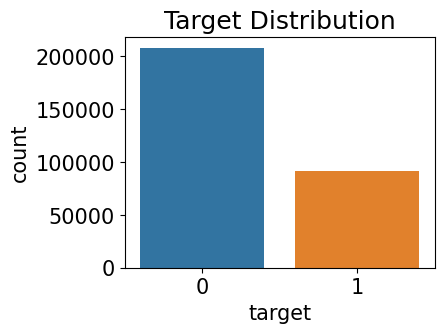

In [63]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 타깃값 분포 확인
mpl.rc('font', size=15)
plt.figure(figsize= (4,3))

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set_title('Target Distribution')
# 타깃값 0이20만개가 넘고 1이 9만개 정도 있다.

In [64]:
rectangle = ax.patches[0]
print('사각형 높이 :', rectangle.get_height())
print('사각형 너비 :', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축위치 :', rectangle.get_x())

사각형 높이 : 208236
사각형 너비 : 0.8
사각형 왼쪽 테두리의 x축위치 : -0.4


In [65]:
print('텍스트 위치의 x 좌표', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y 좌표', rectangle.get_height() + len(train) * 0.001)

텍스트 위치의 x 좌표 0.0
텍스트 위치의 y 좌표 208536.0


Text(0.5, 1.0, 'Target Distribution')

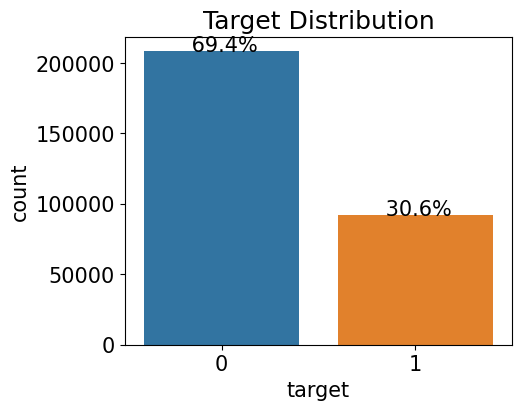

In [66]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height() # 도형 높이(데이터 개수)
        width = patch.get_width() # 도형 너비
        left_coord = patch.get_x() # 도형 왼쪽 테두리의 x축 위치
        percent = height / total_size * 100
        
        # (X, y) 좌표에 텍스트 입력
        ax.text(
            x=left_coord + width/2.0, # x축위치
            y=height + total_size*0.001, # y축위치
            s=f'{percent: 1.1f}%', # 입력 텍스트 
            ha='center' # 가운데 정렬
            )
    
plt.figure(figsize=(5,4))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')
         

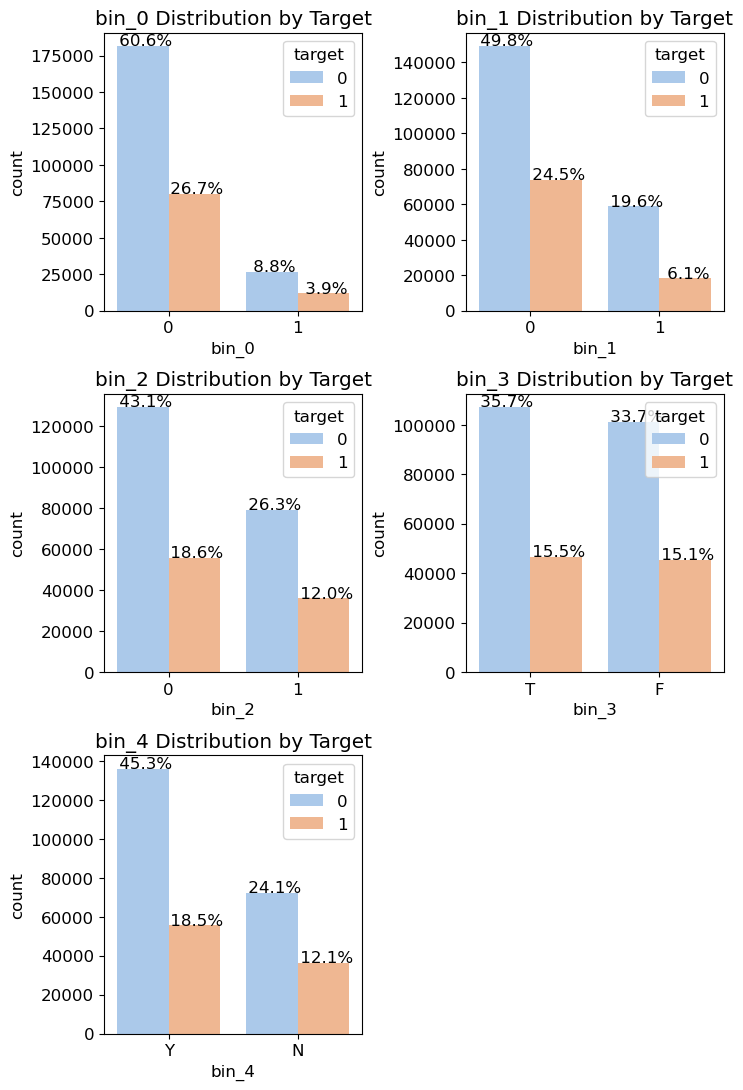

In [67]:
# 이진 피처 분포 

import matplotlib.gridspec as gridspec # 여러 그래프 격자 형태로 배치
# 3행 2열 틀 (Figure) 준비

mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2) # 그래프 (서브플롯) 3행2열로 배치
plt.figure(figsize=(8,13)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax 축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel',
                  ax=ax
                  ),

    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train)) # 비율 표시
        
    
    


In [68]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,72914,23252
Green,85682,41659
Red,49640,26853


In [69]:
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,75.820976,24.179024
Green,67.285478,32.714522
Red,64.894827,35.105173


In [70]:
crosstab = crosstab.reset_index()
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [71]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,75.820976,24.179024
1,Green,67.285478,32.714522
2,Red,64.894827,35.105173


In [72]:
crosstab[1]

0    24.179024
1    32.714522
2    35.105173
Name: 1, dtype: float64

In [73]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x 축은 공유하고 y 축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values,
                        color='black', # 포인트플롯 색상
                        legend=False # 범례 미표시
                        ) # 포인트플롯 순서
    
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [74]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):
    plt.figure(figsize=size) # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3)
        
    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab =get_crosstab(df, feature) # 교차분석표 생성
        
        # ax축에 대한 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)
        
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        ax.set_title(f'{feature} Distribution') # 그래프 제목 생성

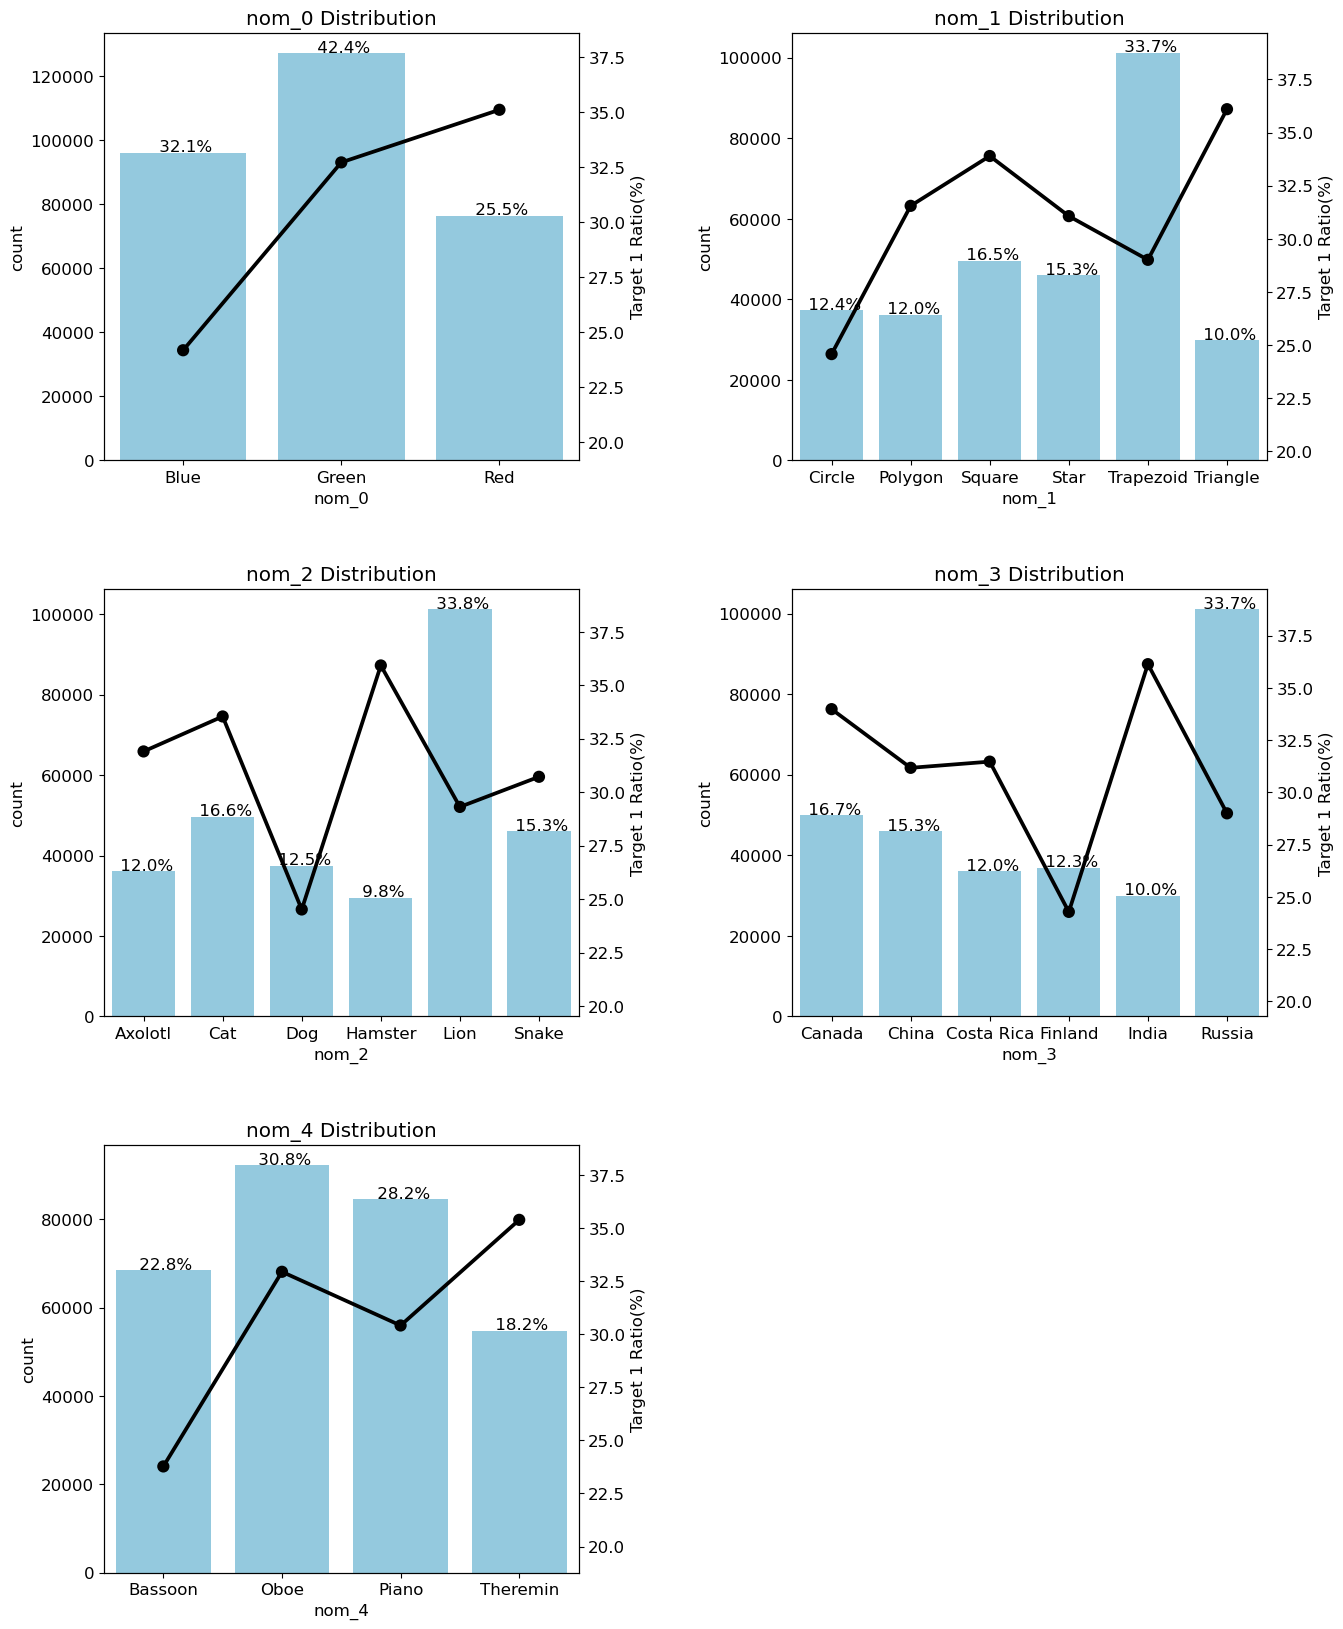

In [75]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

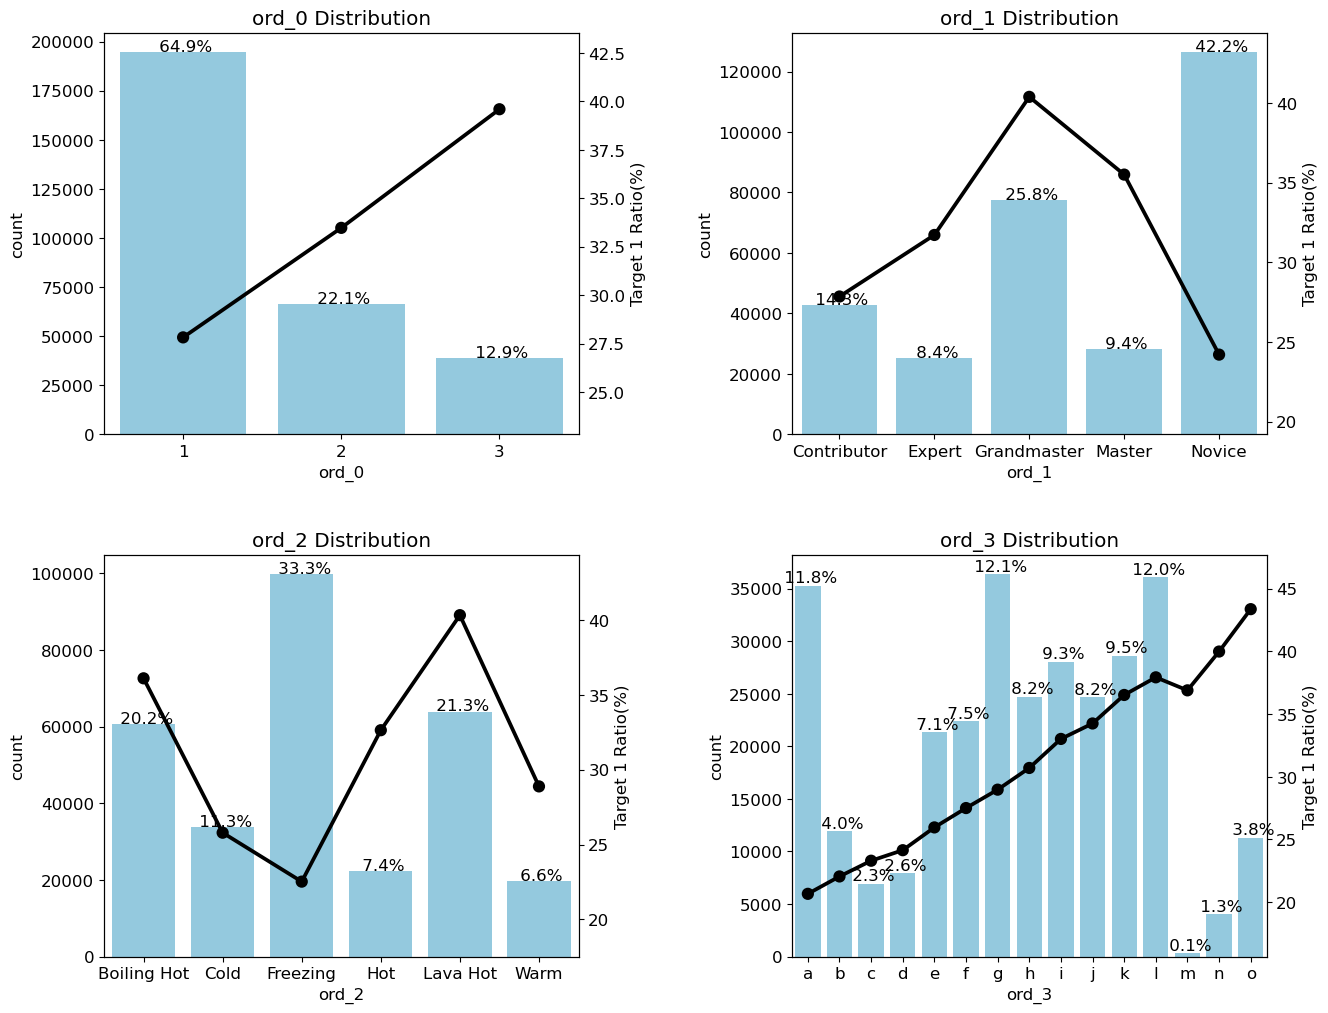

In [76]:
ord_features = ['ord_0','ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2, size=(15,12))

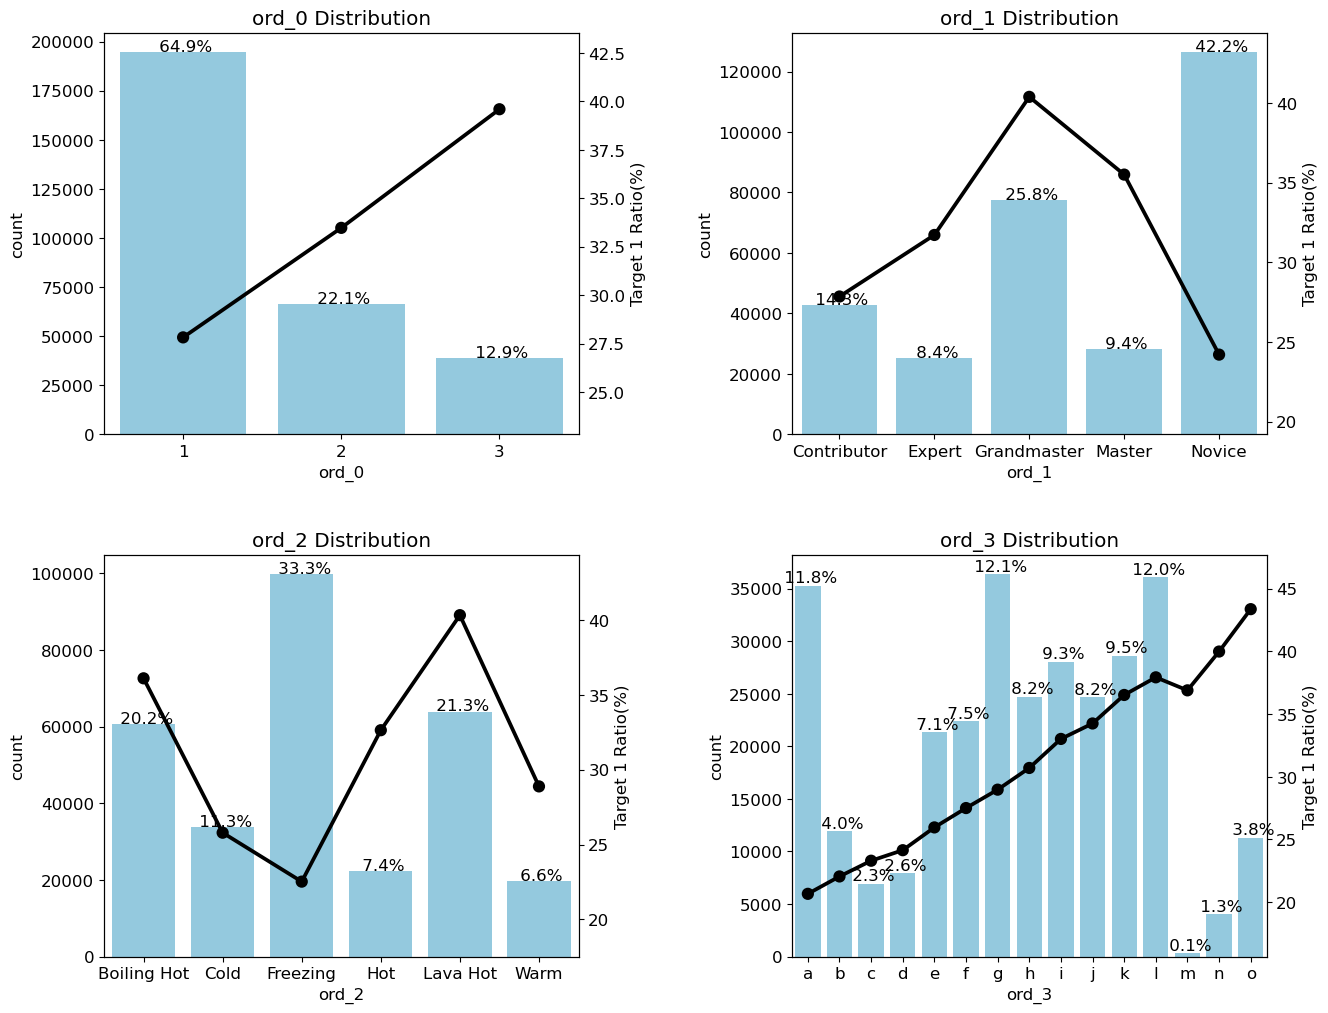

In [77]:
from pandas.api.types import CategoricalDtype

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

plot_cat_dist_with_true_ratio(train, ord_features, num_rows=2, num_cols=2 , size=(15,12))

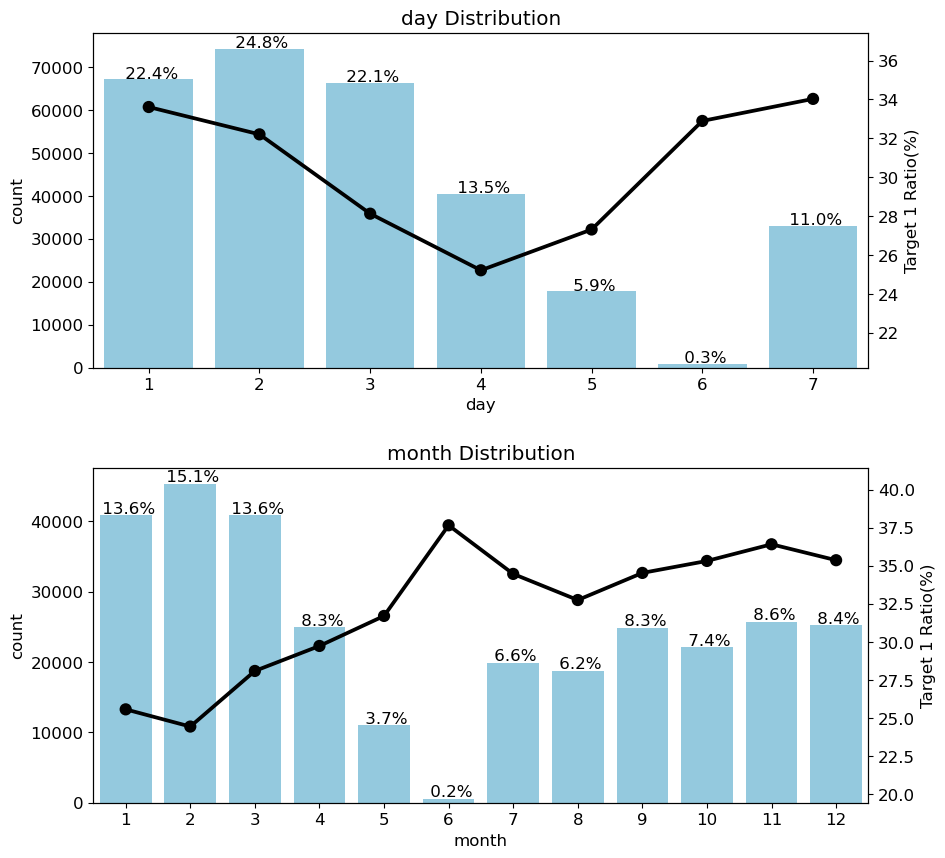

In [78]:
data_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, data_features, num_rows=2, num_cols=1, size=(10,10))

In [ ]:
# 순서형 피처는 대체적으로 고유값 순서에 따라 타깃값이 1인 비율이 증가한다는 사실을 알수 있다. 